Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | SY 2024-2025
<hr> | <hr>
<u>**ACTIVITY 5.** | **Line and Circle Detection**
**Name** | Belocora, John Rome
**Section** | CPE32S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

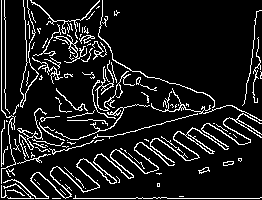

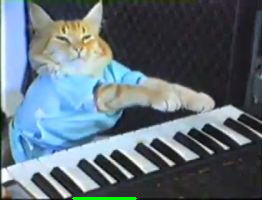

In [3]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

Answers:
1. The "minLineLength = 20"
2. Mathematical Formula = "ρ = x * cos(θ) + y * sin(θ)" it can find lines using Edge detection, Accumulator Space, Peak Detection, and Line Extraction.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

- The HoughCircles function is used to detect circles in an image. It's based on the Hough transform, but adapted for finding circular shapes instead of lines. Its parameters are image, method, dp, minDist, param1, param2, minRadius, and maxRadius.

What happens to the code once you run **and the value of n is 5**?

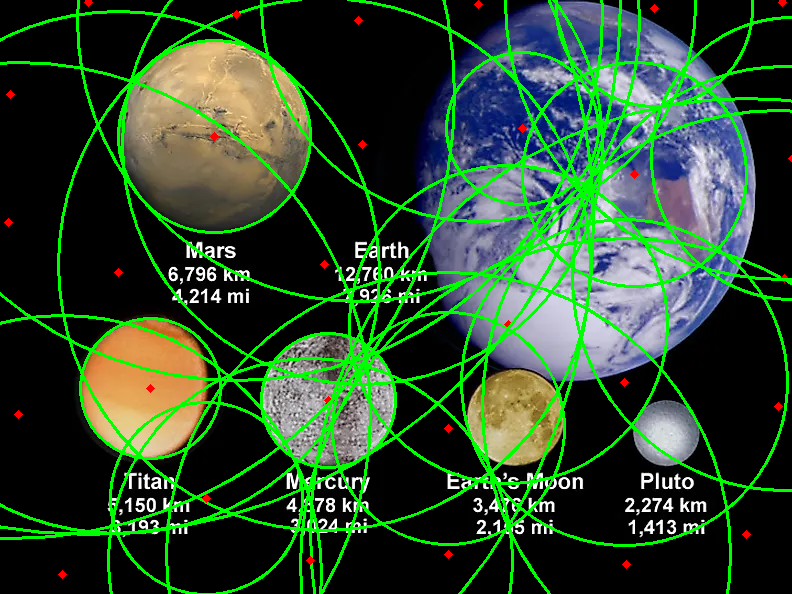

In [6]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/plantes.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

- The circles got messy as we can notice in the image above.

Change the value to 9, **what happens to the image**?

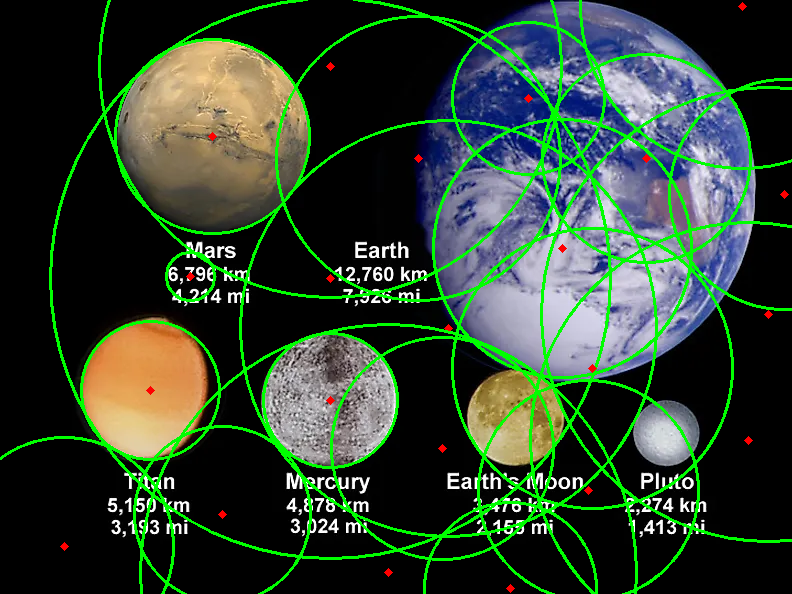

In [7]:
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/plantes.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

It still looks messy but less messy compared to the n = 5

Lastly, change the value to 15, **what can you say about the resulting image?**

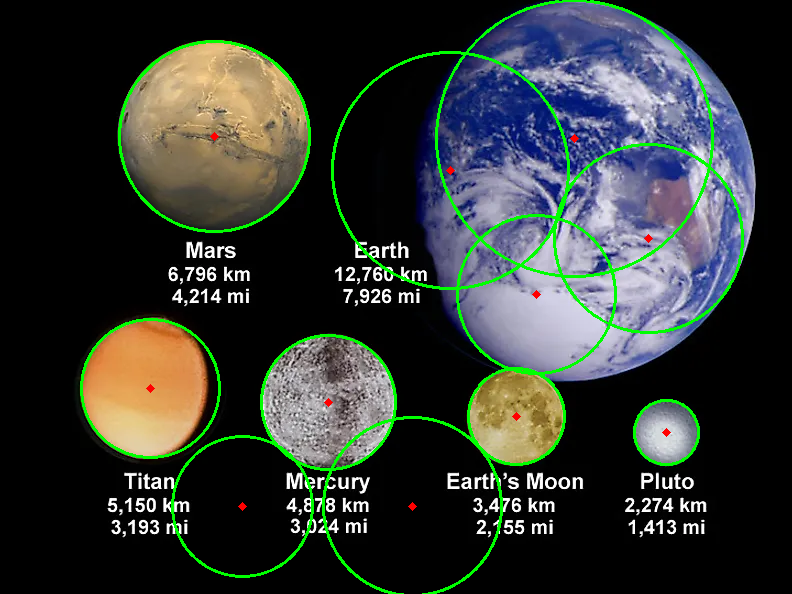

In [8]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/plantes.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

The image got much better circle outlining in the planets compared to the previous results that we got.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

In the provided code, the variable n is used as the kernel size for the cv2.medianBlur() function.  medianBlur() is an image smoothing or denoising technique.

The kernel size the n value determines the size of the sliding window used to calculate the median pixel value within that window. A larger kernel size leads to more aggressive smoothing, effectively blurring finer details and noise but also potentially blurring important edges and features.  

In this specific example, changing n from 5 to 9 and then 15 shows how the blurring affects the circle detection that comes later.  With a smaller n less blurring, the HoughCircles function may detect more circles including some noise, whereas higher n results in smoother images but might lose some of the finer detail necessary for precise circle detection.  The optimal value for n depends on the image and the desired level of smoothing vs. detail preservation.


## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

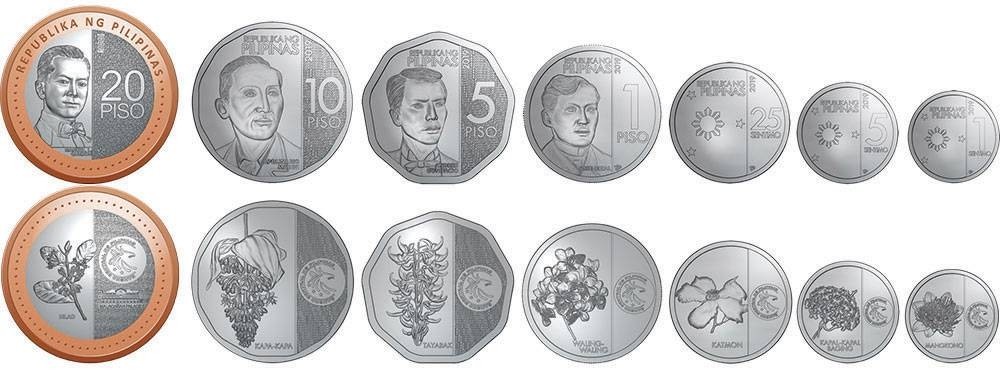

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

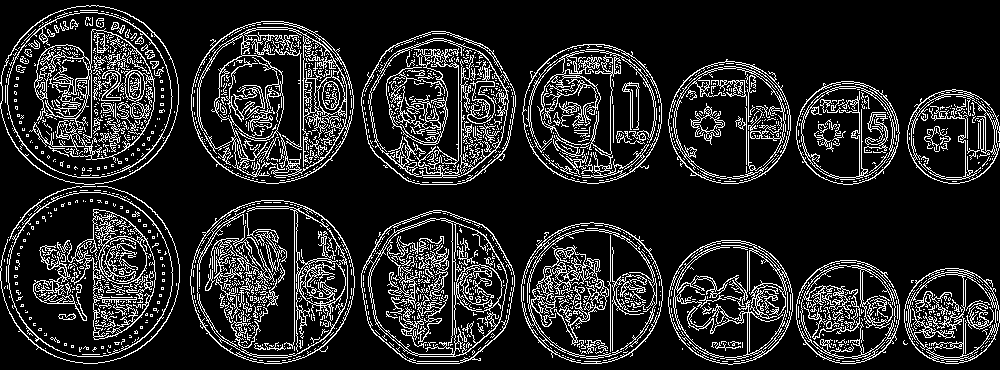

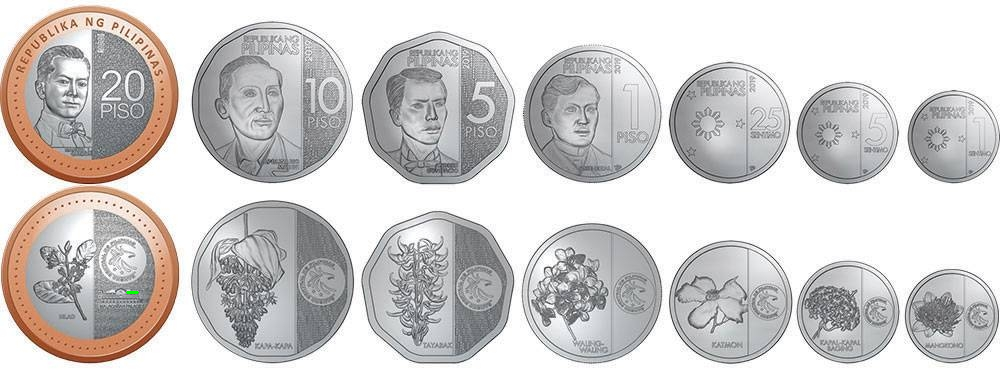

In [24]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

HoughLines cannot reliably count circles.  It detects lines.

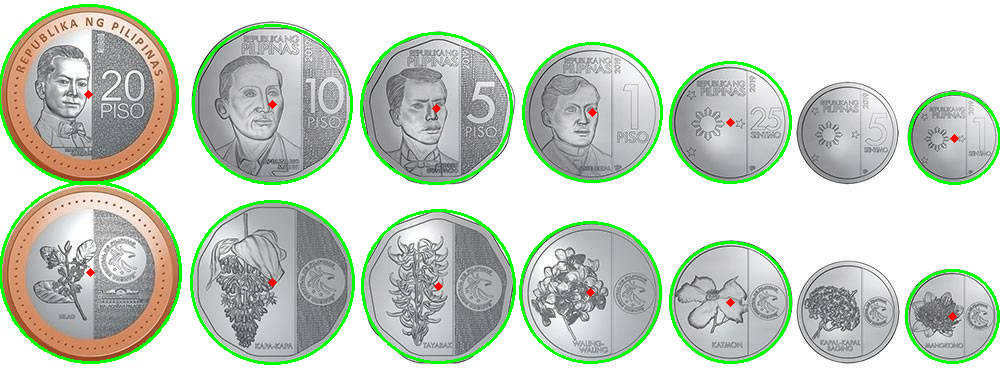

In [22]:
import cv2
import numpy as np

# Our testing value
n = 31

coins = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset (CPE32S3)/coins.jpg')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(coins,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(coins,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("coins_circles.jpg", coins)
cv2_imshow(coins)

We cannot exactly count circles using the houghcircles but we can print its length to count the circles that was detected in the image.

## 5. Summary, Conclusions and Lessons Learned


HoughLinesP and HoughCircles were used to detect lines and circles in an image of coins, respectively. HoughLinesP was ineffective for circle detection, while HoughCircles, despite not providing a precise count, offered a visual representation of detected circles.  The number of detected circles can be approximated by examining the output image or by printing the length of the circles array.  Parameter tuning, especially the n value in median blur and parameters within HoughCircles, affects the detection results.


<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*